https://www.youtube.com/watch?v=0GrciaGYzV0

# Full example. Titanic dataset

###### Your first goal always should be getting a generalized prediction as fast as possible.

- This doesn't mean to skip explorartory data analysis(EDA). It just means to not get caught uo on it. Initially only what is needed to get a generalized prediction.
- Getting a prediction first let's you set a benchmark for yourself. As you make improvements to the model. You should be able to see your desired error metric improve.

In [1]:
# with the goal above. I will improve just what I need.
# the model to use. (I already imported it above, but will do it again here so each example is self-contained)
from sklearn.ensemble import RandomForestRegressor

# the error metric. In this case. We will use c-stat (aka ROC/AUC)
from sklearn.metrics import roc_auc_score

# an efficient data structure.
import pandas as pd

# import the data
X = pd.read_csv("train.csv")
y = X.pop("Survived")

In [2]:
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


I know that there are categorical variables in the dataset, but I will skip them for the moment. I will impute age though, because it will be fast.

In [6]:
# Impute Age with mean
X["Age"].fillna(X["Age"].mean(), inplace=True)
#fix the age because any missing data in sklearn it has non-value or missing it won't run. 
# confirm the code is correct
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Next is to get the numeric variables and look with numbers

In [9]:
# Get just the numeric variables by selecting only the variables that are not "object" datatypes.
numeric_variables = list(X.dtypes[X.dtypes !="object"].index)
X[numeric_variables].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


I notice **PassengerId** looks like a worthless variable. I leave it in for two reasons. First, I don't want to go thriugh the effort of dropping it (although that would be very easy). Second, I am interested in seeing if it is useful for prediction. It might be useful if the PassengerId was was assigned in some non-random way. For example, perhaps PassengerId was assigned based on when the ticket was purchased in which case there might be something predictive about people who purchased their tickets early or late.

In [11]:
# let's build our first model. I always have oob_score=True. It is a good idea to increase n_estimators to a number higher than
# the default. In this case the oob_predictions will be baed on a forest of 33 trees. I set random_state = 42 so that you all the
# replicate the model exactly.
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)

# I only use numeric_variables because I have yet to dummy out the categorical variables
model.fit(X[numeric_variables],y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [16]:
# For regression,  the oob_score_attribute gives the R^2 based on the obb predictions. We want to use c-stat, but I mention the
# for awareness. By the way, attributes in sklearn that have a trailing underscore are only availabe after the model has been.
model.oob_score_
#model.predict
#model.oob_prediction_

0.1361695005913669

In [13]:
y_oob = model.oob_prediction_
print("c-stat:", roc_auc_score(y, y_oob))

c-stat: 0.7399551550399983


In [17]:
y_oob

array([0.71111111, 0.72413793, 0.02325581, 0.47368421, 0.16666667,
       0.34146341, 0.64705882, 0.17647059, 0.52777778, 0.75609756,
       0.72222222, 0.29411765, 0.38709677, 0.625     , 0.87096774,
       0.46875   , 0.04444444, 0.78571429, 0.41304348, 0.24242424,
       0.88571429, 0.64102564, 0.35897436, 0.5       , 0.27777778,
       0.05128205, 0.88636364, 0.71428571, 0.46875   , 0.36842105,
       0.47368421, 0.23684211, 0.84090909, 0.67647059, 0.82051282,
       0.475     , 0.33333333, 0.225     , 0.18421053, 0.53191489,
       0.275     , 0.57777778, 0.11904762, 0.90625   , 0.36363636,
       0.0625    , 0.61764706, 0.62162162, 0.44186047, 0.16129032,
       0.25      , 0.70833333, 0.25      , 0.61290323, 0.36363636,
       0.4       , 0.66666667, 0.5       , 1.        , 0.13157895,
       0.33333333, 0.2       , 0.76923077, 0.21428571, 0.5       ,
       0.25      , 0.36842105, 0.33333333, 0.4516129 , 0.10526316,
       0.88888889, 0.13157895, 0.51351351, 0.23076923, 0.34146

We now have a benchmark. This isn't very good for this dataset; however, it provides us a benchmark for improvement. Before changing parameters for the Random FOrest. Let's whip this dataset into shape.

In [21]:
# here is a simple function to show descriptive stats on the categorical variables
def describe_categorical(X):
    '''
    Just like .describe(). but returns the results for categorical variables only.
    '''
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [22]:
describe_categorical(X)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Johanson, Mr. Jakob Alfred",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [23]:
# Drop the variables I don't feel like dealing with for this tutorial
X.drop(["Name","Ticket","PassengerId"], axis=1, inplace=True)

In [25]:
# Change that Cabin variable to be only the first letter or None
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return "None"
X["Cabin"] = X.Cabin.apply(clean_cabin)

In [26]:
X.Cabin

0      None
1         C
2      None
3         C
4      None
5      None
6         E
7      None
8      None
9      None
10        G
11        C
12     None
13     None
14     None
15     None
16     None
17     None
18     None
19     None
20     None
21        D
22     None
23        A
24     None
25     None
26     None
27        C
28     None
29     None
       ... 
861    None
862       D
863    None
864    None
865    None
866    None
867       A
868    None
869    None
870    None
871       D
872       B
873    None
874    None
875    None
876    None
877    None
878    None
879       C
880    None
881    None
882    None
883    None
884    None
885    None
886    None
887       B
888    None
889       C
890    None
Name: Cabin, Length: 891, dtype: object

In [27]:
categorical_variables = ["Sex","Cabin","Embarked"]

for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    X[variable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # Update X to include dummies and frop the main variable
    X = pd.concat([X,dummies],axis=1)
    X.drop([variable], axis=1, inplace=True)

In [29]:
# Look at all the columns in the dataset
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(X)
# there were columns that are worthless (such as Sex_nan)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


In [31]:
model = RandomForestRegressor(100, oob_score=100, n_jobs=-1, random_state=42)
model.fit(X,y)
print("C-stat:", roc_auc_score(y, model.oob_prediction_))

C-stat: 0.8635211282608464


This is a good model. Now, before we try some different parameters for the model. let's use the python Random Forest to help us with some EDA.

#### Variable importance measures

In [34]:
# to help us to analyses the data in depth more.
# mainly we use it to know which variable is important in the model numericaly.
# the order of the columns as we entered them.
# 1st = Sex, 2nd = Cabin, 3rd = Embarked
model.feature_importances_

array([9.11384671e-02, 2.38891052e-01, 4.43567267e-02, 2.15831071e-02,
       2.15047796e-01, 1.43423437e-01, 1.58822440e-01, 2.95342368e-03,
       3.79055011e-03, 6.47116172e-03, 4.30998991e-03, 8.59480266e-03,
       1.02403226e-03, 8.12054428e-04, 2.67741854e-02, 6.64265010e-05,
       1.06189189e-02, 0.00000000e+00, 6.00379221e-03, 1.53176370e-02])

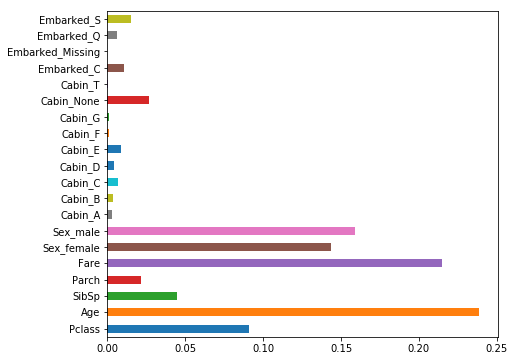

In [69]:
# Simple version that shows all of the variables
# it shows the impact(importance) of each columns in the results
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values()
feature_importances.plot(kind="barh",figsize=(7,6));

In [ ]:
# complex cersion that shows the summary view
def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    """
    By Mike Bernico
    
    Graph the feature importances of a random decision forest using a horizontal bar chart.
    Probably works but untested on other sklearn.ensembles.
    
    Parameters
    ----------
    ensemble = Name of the ensemble whose features you would like graphed.
    feature_names = A list of the names of those features. Displayed on the Y axis.
    autoscale = True (Automatically adjust the X axis size to the largest feature + headroom)/ False = scale from 0 to 1
    headroom = used with autoscale, 0.05 default.
    width = figure width in inches.
    summarized__columns = a list of column prefixes to summarize on, for dummy variables (e.g. ["day_"] would summarize all day)
    """
    if autoscale:
        x_scale = model.feature_importances_.max()+headroom
    else:
        x_scale = 1
        
    feature_dict = dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns:
        # some dummy columns need to be summarized
        for col_name in summarized_columns:
            # sum all the features that contain col_name. store in temp sum_value
            sum_value = sum(x for i, x in feature_dict.items() if col_name in i)
        
            # now remove all keys that are part of col_name
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i]
            for i in keys_to_remove:
                feature_dict.pop(i)
            # lastly, read the summarized field
            feature_dict[col_name] = sum_value
        
    results = pd.Series(feature_dict.values(), index=feature_dict.keys())
    results.sort_values(axis=1)
    results.plot(kind="barh", figsize=(width, len(results)/4), xlim=(0, x_scale))
    
graph_feature_importances(model, X.columns, summarized_columns=categorical_variables)
    

#### Parameter tests

Parameters to test

- **Parametes that will make your model better**
 - **n_estimators:** Th enumber of trees in the forest. Choose as hogh of number as your computer can handle.
 - **max_features:** The number of features to consider when looking for the best split. Try ["auto",None,"sqrt","log2",0.9,0.2]
 - **min_samples_leaf:** The minimum number of samples in newly created leaves. Try[1,2,3]. If 3 is the best, try higher numbers such as 1 through 10.
- **Parameters that will make it easier to train your model**
 - **n_jobs:** Determines if multiple preocessors should be used to train and test the model. Always set this to -1 and %%timeit vs, if it is set to 1. It should be much faster (especially when many trees are trained)

In [76]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(X,y)

4.01 s ± 49.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [77]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X,y)

2.6 s ± 347 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**n_estimators**

30 trees
C-stat: 0.8538704076524037

50 trees
C-stat: 0.8606983457429244

100 trees
C-stat: 0.8635211282608464

200 trees
C-stat: 0.8621922900755228

500 trees
C-stat: 0.863739494455629

100 trees
C-stat: 0.8635211282608464

2000 trees
C-stat: 0.8634492271967107



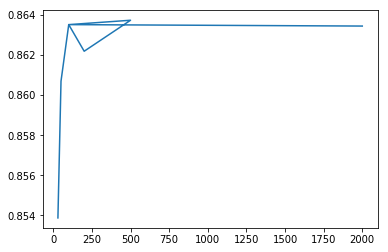

In [81]:
results = []
n_estimator_options = [30,50,100,200,500,100,2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X,y)
    print(trees, "trees")
    roc = roc_auc_score(y, model.oob_prediction_)
    print("C-stat:", roc)
    results.append(roc)
    print("")
    
pd.Series(results, n_estimator_options).plot();

**max_features**

auto option
C-stat: 0.8634492271967107

None option
C-stat: 0.8634492271967107

sqrt option
C-stat: 0.8639019376005284

log2 option
C-stat: 0.8639019376005284

0.9 option
C-stat: 0.8634918352347171

0.2 option
C-stat: 0.8639019376005284



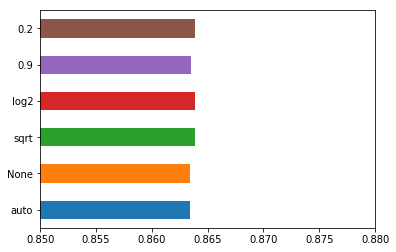

In [87]:
results = []
max_features_options =  ["auto",None,"sqrt","log2",0.9,0.2] 
# sqrt of number of variable like 100 var. is sqrt of 100. which means use 10 in each split of your model 
# auto = None = use all the variable of every single split.
# 0.9 from the features in every split.
for max_features in max_features_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X,y)
    print(max_features, "option")
    roc = roc_auc_score(y, model.oob_prediction_)
    print("C-stat:", roc)
    results.append(roc)
    print("")
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(0.85,0.88));

**min_samples_leaf**

1 min_samples
C-stat: 0.8640430767264244

2 min_samples
C-stat: 0.8696540227313881

3 min_samples
C-stat: 0.8715713844416749

4 min_samples
C-stat: 0.87347809414246

5 min_samples
C-stat: 0.8742690058479532

6 min_samples
C-stat: 0.8740293356341673

7 min_samples
C-stat: 0.8733049989880591

8 min_samples
C-stat: 0.871866977705344

9 min_samples
C-stat: 0.8692945174107096

10 min_samples
C-stat: 0.8674304157479309



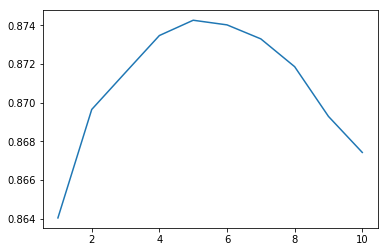

In [89]:
results = []
min_samples_leaf_options =  [1,2,3,4,5,6,7,8,9,10] 

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000,
                                  oob_score = True,
                                  n_jobs=-1,
                                  random_state=42,
                                  max_features="auto",
                                 min_samples_leaf=min_samples)
    model.fit(X,y)
    print(min_samples, "min_samples")
    roc = roc_auc_score(y, model.oob_prediction_)
    print("C-stat:", roc)
    results.append(roc)
    print("")
    
pd.Series(results, min_samples_leaf_options).plot();

**Final model**

In [90]:
model = RandomForestRegressor(n_estimators=1000,
                                  oob_score = True,
                                  n_jobs=-1,
                                  random_state=42,
                                  max_features="auto",
                                 min_samples_leaf=5)
model.fit(X,y)
roc = roc_auc_score(y, model.oob_prediction_)
print("C-stat:", roc)

C-stat: 0.8742690058479532
